Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

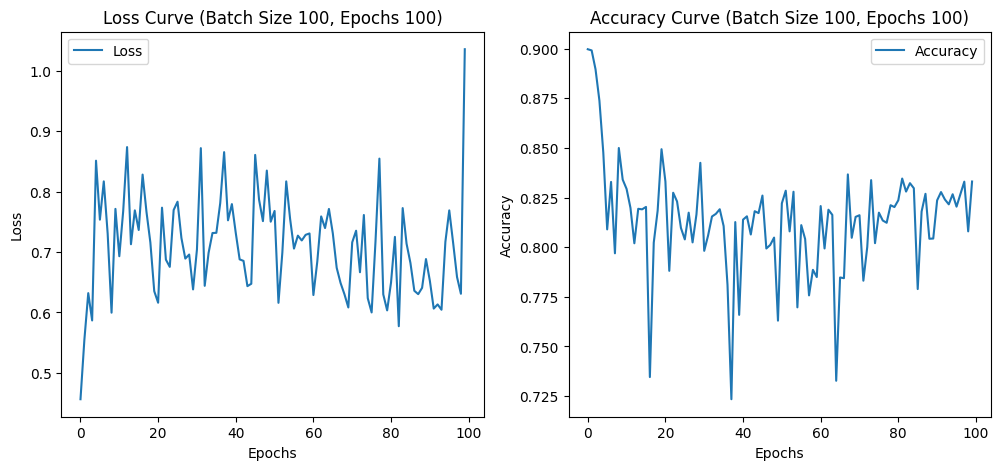

Batch Size: 100, Epochs: 100
Test Accuracy: 0.8326
Confusion Matrix:
[[ 901    0    0    0    0    0    3    1   75    0]
 [   0 1090    0    3    0    1    2    0   38    1]
 [   1    0  738    4    1    0    3    2  283    0]
 [   1    0    1  797    0    0    0    1  209    1]
 [   1    0    0    0  803    0    5    0  170    3]
 [   4    0    0    5    1  664    2    0  216    0]
 [   2    2    0    0    1    1  847    0  105    0]
 [   0    0    4    2    3    1    0  863  145   10]
 [   0    0    0    3    3    2    1    0  965    0]
 [   2    1    0    1    8    0    0    2  337  658]]
Execution Time: 1456.30 seconds

Results saved to mnist_nn_results_E(100)_B(100).csv


In [1]:
import tensorflow as tf
import numpy as np
import time
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 784).astype(np.float32) / 255.0, x_test.reshape(-1, 784).astype(np.float32) / 255.0

y_train = tf.one_hot(y_train, depth=10, dtype=tf.float32)
y_test_labels = y_test  # Store original labels for confusion matrix
y_test = tf.one_hot(y_test, depth=10, dtype=tf.float32)

# Define model parameters
n_hidden = 256
W1 = tf.Variable(tf.random.normal([784, n_hidden], dtype=tf.float32))
b1 = tf.Variable(tf.random.normal([n_hidden], dtype=tf.float32))
W2 = tf.Variable(tf.random.normal([n_hidden, 10], dtype=tf.float32))
b2 = tf.Variable(tf.random.normal([10], dtype=tf.float32))

# Define model
def model(X):
    Z1 = tf.add(tf.matmul(X, W1), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(A1, W2), b2)
    return Z2

# Loss function
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y_pred))

# Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.1)

# Single configuration
batch_size = 100
epochs = 100

start_time = time.time()
loss_curve, acc_curve = [], []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
    for batch_x, batch_y in dataset:
        with tf.GradientTape() as tape:
            logits = model(batch_x)
            loss = loss_fn(batch_y, logits)
        grads = tape.gradient(loss, [W1, b1, W2, b2])
        optimizer.apply_gradients(zip(grads, [W1, b1, W2, b2]))
    
    train_loss = loss_fn(y_train, model(x_train)).numpy()
    train_acc = np.mean(tf.argmax(model(x_train), axis=1) == tf.argmax(y_train, axis=1))
    loss_curve.append(train_loss)
    acc_curve.append(train_acc)

test_acc = np.mean(tf.argmax(model(x_test), axis=1) == tf.argmax(y_test, axis=1))
y_pred = tf.argmax(model(x_test), axis=1).numpy()
conf_matrix = confusion_matrix(y_test_labels, y_pred)
exec_time = time.time() - start_time

# Store results
results = [[batch_size, epochs, train_loss, train_acc, test_acc, exec_time]]

# Plot loss and accuracy curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), loss_curve, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title(f'Loss Curve (Batch Size {batch_size}, Epochs {epochs})')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(epochs), acc_curve, label='Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title(f'Accuracy Curve (Batch Size {batch_size}, Epochs {epochs})')
plt.legend()

plt.show()

# Print results
print(f"Batch Size: {batch_size}, Epochs: {epochs}")
print(f"Test Accuracy: {test_acc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print(f"Execution Time: {exec_time:.2f} seconds\n")

# Save results to file
df = pd.DataFrame(results, columns=["Batch Size", "Epochs", "Train Loss", "Train Accuracy", "Test Accuracy", "Execution Time"])
df.to_csv("mnist_nn_results_E(100)_B(100).csv", index=False)
print("Results saved to mnist_nn_results_E(100)_B(100).csv")
